In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

2023-06-29 22:04:43.202693: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 22:04:43.256687: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 22:04:43.257496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 22:04:44.265053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [29]:
# Pembutan Model/Arsitektur Neural Network
dnn_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(400),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(400),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(400),
    tf.keras.layers.Activation('relu'),
    # tf.keras.layers.Dense(50),
    # tf.keras.layers.Activation('relu'),
    # tf.keras.layers.Dense(20),
    # tf.keras.layers.Activation('relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation="linear")
])

In [5]:
# costom loss function
def rmse(y_true, y_pred): #Trial
  return K.sqrt(K.mean(K.square(y_pred-y_true)))

def lms(y_true,y_pred): #by simon haykin book's
  return (K.square(y_pred-y_true))/2

In [31]:
# Model Compiler dengan least mean square untuk loss and Adam untuk optimizer
dnn_model.compile(loss=lms, optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001))

In [32]:
# Dataset
df = pd.read_csv('J1_Atas Bawah.csv')
df.dropna(inplace=True)

df = df.sample(frac = 1)

X = df[['x', 'y', 'z', 'roll', 'pitch', 'yaw']]
y = df[['theta1', 'theta2', 'theta3', 'theta4']]

train_size = int(0.80 * len(df)) #by Sebastian Raschka book's
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [33]:
# Fungsi Pembatasan Error/Loss
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("Checking loss at end of epoch...")
        if logs['val_loss'] <= 0.00001:             #by TA 2017 ("Tegar Wangi Arlean")
               self.model.stop_training = True
        else:
          print ('not yet...')

In [34]:
# Training dataset
loss_callback_obj = myCallback()
dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000, batch_size=200, verbose=1, callbacks=[loss_callback_obj]);

Epoch 1/10000
7/7 [==============================] - ETA: 0s - loss: 0.2647Checking loss at end of epoch...
not yet...
7/7 [==============================] - 1s 43ms/step - loss: 0.2647 - val_loss: 0.2540
Epoch 2/10000
7/7 [==============================] - ETA: 0s - loss: 0.2550Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 15ms/step - loss: 0.2550 - val_loss: 0.2452
Epoch 3/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.2681Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 15ms/step - loss: 0.2460 - val_loss: 0.2371
Epoch 4/10000
7/7 [==============================] - ETA: 0s - loss: 0.2375Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 14ms/step - loss: 0.2375 - val_loss: 0.2296
Epoch 5/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.2316Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 13ms/step - loss: 0

In [35]:
tf.keras.models.save_model(dnn_model, "ModelNN.h5")

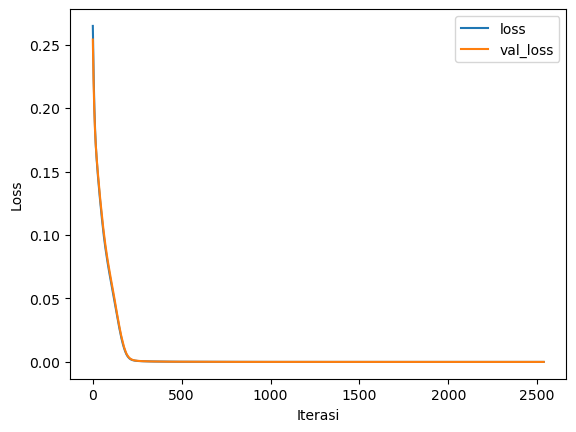

In [36]:
# Perbandingan loss dan validation loss
history_df =pd.DataFrame(dnn_model.history.history)
loss_plot = history_df[['loss', 'val_loss']].plot()
loss_plot.set_xlabel('Iterasi')
loss_plot.set_ylabel('Loss')
fig = loss_plot.get_figure()
plt.show()

#fig.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Error PO/e1_h5_n50_n300_n100_n50_n20 (e0.00001).png')

In [37]:
# Testing
X_target = X_test.iloc[0:].values
Y_target = y_test.iloc[0:].values

Y_prediksi = dnn_model.predict(X_target)

10/10 [==============================] - 0s 3ms/step


In [38]:
asd = np.concatenate([X_target, Y_target, Y_prediksi], axis=1)
column_labels = ['x','y','z','roll','pitch','yaw','theta1','theta2','theta3','theta4','theta1_Pred','theta2_pred','theta3_pred','theta4_pred']
df = pd.DataFrame(asd, columns=column_labels)
df

#df.to_csv('test_h3_n400_n400_n400_.csv', index=False)

,x,y,z,roll,pitch,yaw,theta1,theta2,theta3,theta4,theta1_Pred,theta2_pred,theta3_pred,theta4_pred
0,0.143,-0.226,0.118,3.141,2.799,2.093,-1.047,0.454,0.567,-1.363,-1.053467,0.454452,0.568585,-1.364945
1,0.253,-0.139,0.158,3.141,2.712,2.618,-0.523,0.379,0.333,-1.141,-0.529216,0.380763,0.336953,-1.146118
2,0.149,-0.237,0.144,3.140,2.741,2.095,-1.047,0.404,0.408,-1.213,-1.052568,0.404924,0.410656,-1.214678
3,0.136,0.215,0.331,0.002,0.734,1.049,1.047,0.119,-0.504,-0.350,1.043396,0.118553,-0.499692,-0.354344
4,0.143,0.131,0.396,0.000,0.874,0.786,0.785,0.000,-0.873,0.000,0.785948,0.000671,-0.870221,-0.001970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.172,-0.092,0.396,3.141,2.269,2.619,-0.523,0.000,-0.873,0.000,-0.521004,0.000613,-0.866263,-0.003815
304,0.296,0.000,0.190,0.000,0.489,0.000,0.000,0.329,0.171,-0.988,-0.002080,0.327970,0.168355,-0.985543
305,0.190,0.178,0.103,0.000,0.304,0.785,0.785,0.486,0.669,-1.460,0.785210,0.486859,0.672193,-1.464456
306,0.251,0.000,0.089,0.000,0.265,0.000,0.000,0.521,0.779,-1.564,-0.000174,0.519232,0.775121,-1.559816


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

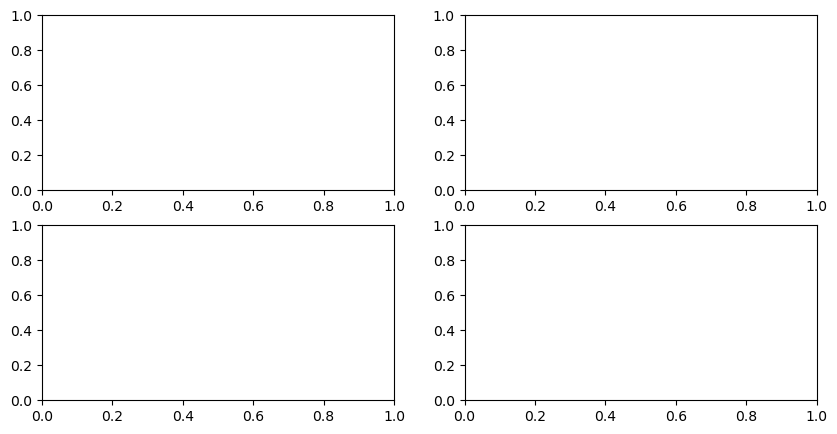

In [39]:
# Data Tabel dan Grafik Hasil Testing
dataf = pd.DataFrame({'theta1':Y_target[:,0], 'theta1_pred':Y_prediksi[:,0],
                  'theta2':Y_target[:,1], 'theta2_pred':Y_prediksi[:,1],
                  'theta3':Y_target[:,2], 'theta3_pred':Y_prediksi[:,2],
                  'theta4':Y_target[:,3], 'theta4_pred':Y_prediksi[:,3]}).sort_values(by=['theta1'])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
axes = ax.flatten()

axes[0].plot([i for i in range(len(dataf))], dataf['theta1'], label='theta1')
axes[0].plot([i for i in range(len(dataf))], dataf['theta1_pred'], label='theta1_pred')
axes[0].set_title('theta1')
axes[0].legend(bbox_to_anchor=(1.1, 1.05))
axes[0].set_xlabel('Jumlah Data')
axes[0].set_ylabel('Nilai Theta')

axes[1].plot([i for i in range(len(dataf))], dataf['theta2'], label='theta2')
axes[1].plot([i for i in range(len(dataf))], dataf['theta2_pred'], label='theta2_pred')
axes[1].set_title('theta2')
axes[1].legend(bbox_to_anchor=(1.1, 1.05))
axes[1].set_xlabel('Jumlah Data')
axes[1].set_ylabel('Nilai Theta')

axes[2].plot([i for i in range(len(dataf))], dataf['theta3'], label='theta3')
axes[2].plot([i for i in range(len(dataf))], dataf['theta3_pred'], label='theta3_pred')
axes[2].set_title('theta3')
axes[2].legend(bbox_to_anchor=(1.1, 1.05))
axes[2].set_xlabel('Jumlah Data')
axes[2].set_ylabel('Nilai Theta')

axes[3].plot([i for i in range(len(dataf))], dataf['theta4'], label='theta4')
axes[3].plot([i for i in range(len(dataf))], dataf['theta4_pred'], label='theta4_pred')
axes[3].set_title('theta4')
axes[3].legend(bbox_to_anchor=(1.1, 1.05))
axes[3].set_xlabel('Jumlah Data')
axes[3].set_ylabel('Nilai Theta')

plt.tight_layout()
dataf

#plt.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Joint PO/J1_h5_n50_n300_n100_n50_n20 (e0.00001).png')

In [40]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_target, Y_prediksi)

1.9721397348107836e-05

In [41]:
# Root Mean Square Error
rmse(Y_target, Y_prediksi)

<tf.Tensor: shape=(), dtype=float64, numpy=0.00444087799293201>

In [ ]:
dataf.to_csv('data.csv', index=False)

In [6]:
# Data Predict
# Masukan Input disini
loaded_model = tf.keras.models.load_model("ModelNN.h5", custom_objects={"lms": lms })
data = {
    'x': 0.072,
    'y': 0.219,
    'z': 0.365,
    'roll': 0.001,
    'pitch': 1.047,
    'yaw': 1.31
}

# Create a DataFrame with a single row
df = pd.DataFrame(data, index=[0])

Y_prediksi = loaded_model.predict(df)
print(Y_prediksi)

1/1 [==============================] - 0s 122ms/step
[[ 1.2725406   0.00907816 -0.90378994 -0.04343066]]


In [43]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 400)               2800      
                                                                 
 activation_3 (Activation)   (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 400)               160400    
                                                                 
 activation_4 (Activation)   (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 400)               160400    
                                                                 
 activation_5 (Activation)   (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                